# FAKE NEWS PREDICTION

PROBLEM STATEMENT:
Build a system to identify unreliable news articles

ABOUT THE DATASET:

id: unique id for a news article

title: the title of a news article

author: author of the news article

text: the text of the article; could be incomplete

label: a label that marks whether the news article is real or fake:

    1: Fake news
    
    0: real News

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [4]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
# loading the dataset to a pandas DataFrame
dataset = pd.read_csv('C:\\Users\\Arindam\\Documents\\Downloads\\fake-news\\train.csv')

In [6]:
dataset.shape

(20800, 5)

In [7]:
# print the first 5 rows of the dataframe
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


DATA PREPARATION

In [8]:
# counting the number of missing values in the dataset
dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# replacing the null values with empty string
dataset = dataset.fillna('')

In [11]:
#checking for duplicate data
dup = dataset[dataset.duplicated(subset=["text"])]
dup.head()

,id,title,author,text,label
169,169,Mohamad Khweis: Another “Virginia Man” (Palest...,James Fulford,,1
295,295,A Connecticut Reader Reports Record Voter Regi...,VDARE.com Reader,,1
470,470,BULLETIN: There ARE Righteous Jews For Trump!;...,admin,,1
480,480,Watch: Muslim ‘Palestinians’ Declare “We follo...,admin,jewsnews © 2015 | JEWSNEWS | It's not news...u...,1
573,573,Le top des recherches Google passe en top des ...,,,1


In [12]:
# drop duplicated data
dataset = dataset.drop_duplicates(subset={"text"}, keep='first', inplace=False)
dataset.shape

(20387, 5)

PREPROCESSING DATA

In [13]:
# merging the author name and news title
dataset['content'] = dataset['author']+' '+dataset['title']

In [14]:
print(dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20387, dtype: object


In [15]:
# separating the data & label
X = dataset.drop(columns='label', axis=1)
Y = dataset['label']

In [16]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

Stemming is the process of reducing a word to its Root word.

In [17]:
#use stemming
port_stem = PorterStemmer()

In [18]:
def stemming(content):
    #removing special character
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    # change to lower case
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    # remove stop words
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    # join words to make sentence
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [19]:
#applying stemming
dataset['content'] = dataset['content'].apply(stemming)

In [20]:
print(dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20387, dtype: object


In [21]:
#separating the data and label
X = dataset['content'].values
Y = dataset['label'].values

In [22]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [23]:
print(Y)

[1 0 1 ... 0 1 1]


In [24]:
Y.shape

(20387,)

VECTORIZATION

In [25]:
# converting the textual data to numerical data using TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [26]:
print(X)

  (0, 15451)	0.28415874778011174
  (0, 13272)	0.2565124746781269
  (0, 8771)	0.36294926281541967
  (0, 8498)	0.29216519564558563
  (0, 7571)	0.24739498274004798
  (0, 6887)	0.21814103959559275
  (0, 4881)	0.23277733975253848
  (0, 3721)	0.26983322024365697
  (0, 3531)	0.35924469601500036
  (0, 2902)	0.24638122865754783
  (0, 2437)	0.3714929501117918
  (0, 263)	0.26983322024365697
  (1, 16554)	0.30113460364503924
  (1, 6700)	0.19139849164144257
  (1, 5408)	0.713971455185531
  (1, 3499)	0.26334216698116447
  (1, 2758)	0.1920186027690979
  (1, 2182)	0.3826119853682611
  (1, 1857)	0.1545730059334866
  (1, 1467)	0.2939801742204615
  (2, 15377)	0.4151085973435784
  (2, 9472)	0.49336409005220766
  (2, 5866)	0.3482159254500924
  (2, 5295)	0.38661569372839827
  (2, 3042)	0.4607447794049962
  :	:
  (20384, 12925)	0.24782623521709649
  (20384, 12157)	0.2717183692935831
  (20384, 11955)	0.24688075398324164
  (20384, 10147)	0.07965988936916785
  (20384, 9440)	0.17389681533760748
  (20384, 9370)	0.2

Splitting the dataset to training & test data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [28]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (16309, 16878)
Test size: (4078, 16878)


TRAINING THE MODEL

In [29]:
#LOGISTIC REGRESSION

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, Y_train)

LogisticRegression()

Evaluation

accuracy score

In [32]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9873689373965295


In [34]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.978175576262874


In [36]:
#plotting confusion matrix on test data
cm=confusion_matrix( Y_test,X_test_prediction)

In [37]:
cm

array([[2008,   70],
       [  19, 1981]], dtype=int64)

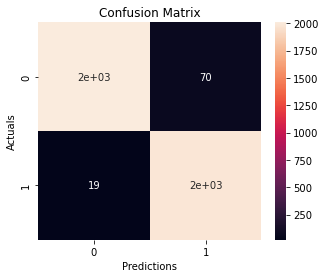

In [38]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predictions")
plt.ylabel("Actuals")
plt.title("Confusion Matrix", fontsize=12)
plt.show()

In [39]:
#NAIVE BAYES ALGORITHM

In [40]:
nb_model = MultinomialNB(alpha=0.5)

In [41]:
nb_model.fit(X_train, Y_train)
# predict on train data
X_train_predict = nb_model.predict(X_train)
# train_accuracy
train_accuracy = accuracy_score(Y_train, X_train_predict)


In [42]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9873689373965295


In [43]:

# predict on test data
X_test_predict = nb_model.predict(X_test)
# test_accuracy
test_accuracy = accuracy_score(Y_test, X_test_predict)

In [44]:
print('Accuracy score of the testing data : ', test_accuracy)

Accuracy score of the testing data :  0.9470328592447278


In [45]:
#plotting the confusion matrix
cm=confusion_matrix( Y_test,X_test_predict)

In [46]:
cm

array([[2068,   10],
       [ 206, 1794]], dtype=int64)

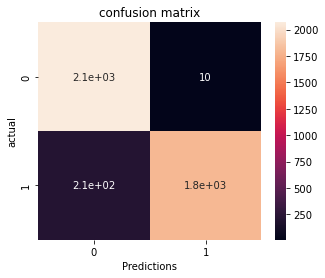

In [47]:
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True)
plt.title("confusion matrix")
plt.xlabel("Predictions")
plt.ylabel("actual")
plt.show()

Making a Predictive System

In [48]:
news = X_test[3]

prediction = model.predict(news)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [49]:
print(Y_test[3])

0


CONCLUSION

Logistic regression with TF-IDF model are giving good result.